In [1]:
import numpy as np
import pandas as pd
import regex as re

In [2]:
df = pd.read_csv("/home/in2itadmin/Downloads/Syslog.csv")

In [3]:
df.head()

,timestamp,source,message
0,2024-06-11T11:54:07.059Z,syslog,Jun 11 2024 11:52:42 GPN-0003_TRC-CR_X8-01 %%0...
1,2024-06-11T11:54:08.485Z,syslog,Jun 11 2024 11:52:46 GPN-0001_TLK-CR_M14-01 %%...
2,2024-06-11T11:54:13.338Z,syslog,Jun 11 2024 11:52:51 GPN-0277_DAV-CLI_AR12-01 ...
3,2024-06-11T11:54:14.203Z,syslog,Jun 11 2024 11:26:54 GBN-0001_TLK-CR_M14-02 %%...
4,2024-06-11T11:54:14.203Z,syslog,Jun 11 2024 11:26:54 GBN-0001_TLK-CR_M14-02 %%...


In [4]:
df.describe()

,timestamp,source,message
count,100000,100000,100000
unique,91195,1,98375
top,2024-06-11T12:20:51.219Z,syslog,Jun 11 2024 12:47:23 GPN-0008_SBA-CR_M14-01 %%...
freq,34,100000,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   timestamp  100000 non-null  object
 1   source     100000 non-null  object
 2   message    100000 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [6]:
df.head()

,timestamp,source,message
0,2024-06-11T11:54:07.059Z,syslog,Jun 11 2024 11:52:42 GPN-0003_TRC-CR_X8-01 %%0...
1,2024-06-11T11:54:08.485Z,syslog,Jun 11 2024 11:52:46 GPN-0001_TLK-CR_M14-01 %%...
2,2024-06-11T11:54:13.338Z,syslog,Jun 11 2024 11:52:51 GPN-0277_DAV-CLI_AR12-01 ...
3,2024-06-11T11:54:14.203Z,syslog,Jun 11 2024 11:26:54 GBN-0001_TLK-CR_M14-02 %%...
4,2024-06-11T11:54:14.203Z,syslog,Jun 11 2024 11:26:54 GBN-0001_TLK-CR_M14-02 %%...


In [7]:
np.size(df['message'])

100000

In [8]:
# for i in range(0,np.size(df['message'])):
    
#     log_entry = df['message'][i]
#     log_entry = str(log_entry)
#     date_pattern = r"(\w+)\s+(\d+)\s+(\d+)\s+(\d+:\d+:\d+)"
#     date_match = re.search(date_pattern, log_entry)
    
#     if date_match:
#         df['month'], df['day'], df['year'], df['time'] = date_match.groups()
#     # print(month, day , year , time)
# df.head()

In [9]:
date_pattern = r"(\w+)\s+(\d+)\s+(\d+)\s+(\d+:\d+:\d+)"
host_pattern = r"(\S+)\s+%%"
module_pattern = r"%%(\d+)(\w+)/(\d+)/(\w+)"
description_pattern = r'(?P<description>.*)$'


In [10]:
months, days, years, times, hosts = [], [], [], [], []
version_numbers, module_names, severities, log_types = [], [], [], []
descriptions = []

In [11]:
for i in range(len(df)):
    
    log_entry = df['message'].iloc[i]

    
    month, day, year, time = None, None, None, None
    host = None
    version_number, module_name, severity, log_type = None, None, None, None
    description = None


    
    date_match = re.search(date_pattern, log_entry)
    host_match = re.search(host_pattern, log_entry)
    module_match = re.search(module_pattern, log_entry)
    description_match = re.search(description_pattern, log_entry)

    
    if date_match:
        month, day, year, time = date_match.groups()
    if host_match:
        host = host_match.group(1)
    if module_match:
        version_number, module_name, severity, log_type = module_match.groups()
    if description_match:
        description = description_match.group()

    
    months.append(month)
    days.append(day)
    years.append(year)
    times.append(time)
    hosts.append(host)
    version_numbers.append(version_number)
    module_names.append(module_name)
    severities.append(severity)
    log_types.append(log_type)
    descriptions.append(description)


In [12]:
df['month'] = months
df['day'] = days
df['year'] = years
df['time'] = times
df['host'] = hosts
df['version_number'] = version_numbers
df['module_name'] = module_names
df['severity'] = severities
df['log_type'] = log_types
df['description'] = descriptions

In [13]:
df.head()

,timestamp,source,message,month,day,year,time,host,version_number,module_name,severity,log_type,description
0,2024-06-11T11:54:07.059Z,syslog,Jun 11 2024 11:52:42 GPN-0003_TRC-CR_X8-01 %%0...,Jun,11,2024,11:52:42,GPN-0003_TRC-CR_X8-01,01,OSPF,4,CONFLICT_ROUTERID_INTF,Jun 11 2024 11:52:42 GPN-0003_TRC-CR_X8-01 %%0...
1,2024-06-11T11:54:08.485Z,syslog,Jun 11 2024 11:52:46 GPN-0001_TLK-CR_M14-01 %%...,Jun,11,2024,11:52:46,GPN-0001_TLK-CR_M14-01,01,SNMP,4,SNMP_IPUNLOCK,Jun 11 2024 11:52:46 GPN-0001_TLK-CR_M14-01 %%...
2,2024-06-11T11:54:13.338Z,syslog,Jun 11 2024 11:52:51 GPN-0277_DAV-CLI_AR12-01 ...,Jun,11,2024,11:52:51,GPN-0277_DAV-CLI_AR12-01,01,SNMP,5,SNMP_LOG_IP_UNLOCK,Jun 11 2024 11:52:51 GPN-0277_DAV-CLI_AR12-01 ...
3,2024-06-11T11:54:14.203Z,syslog,Jun 11 2024 11:26:54 GBN-0001_TLK-CR_M14-02 %%...,Jun,11,2024,11:26:54,GBN-0001_TLK-CR_M14-02,01,TCP,4,SOCKET_TCP_PACKET_MD5_AUTHEN_FAIL,Jun 11 2024 11:26:54 GBN-0001_TLK-CR_M14-02 %%...
4,2024-06-11T11:54:14.203Z,syslog,Jun 11 2024 11:26:54 GBN-0001_TLK-CR_M14-02 %%...,Jun,11,2024,11:26:54,GBN-0001_TLK-CR_M14-02,01,TCP,4,hwTCPMD5AuthenFail,Jun 11 2024 11:26:54 GBN-0001_TLK-CR_M14-02 %%...


In [14]:
df['message'][4]

'Jun 11 2024 11:26:54 GBN-0001_TLK-CR_M14-02 %%01TCP/4/hwTCPMD5AuthenFail(t):CID=0x80650553-OID=1.3.6.1.4.1.2011.5.25.34.2.1;TCP MD5 authentication failed. (tcpConnLocalAddress=172.31.0.103, tcpConnLocalPort=54291, tcpConnRemAddress=172.31.0.9, tcpConnRemPort=179, hwTCPProtocol=BGP, hwTCPVrfName=_public_)'

In [15]:
total = np.size(df['message'])
df.isnull().sum()/total*100

timestamp         0.000
source            0.000
message           0.000
month             0.000
day               0.000
year              0.000
time              0.000
host              4.468
version_number    4.468
module_name       4.468
severity          4.468
log_type          4.468
description       0.000
dtype: float64

In [16]:
df['log_type'].value_counts()/total*100


log_type
SACL_LOG                 67.892
SSH_USER_LOGIN_FAIL       3.283
OPS_OPER_SUCCESS          2.022
CMDRECORD                 1.932
ospfIfConfigError         1.437
                          ...  
TIMEOUT                   0.001
INTER_CMDRECORD           0.001
IF_INFO_CHANGE            0.001
hwArpsGatewayConflict     0.001
LOGFILE_DELETED           0.001
Name: count, Length: 159, dtype: float64

In [17]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['year'] = df['timestamp'].dt.year
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()

pattern = r"LINE[^:]*:"
df['line_segment'] = df['message'].apply(lambda x: re.search(pattern, x).group() if re.search(pattern, x) else None)


In [18]:
df.describe(include='all')

,timestamp,source,message,month,day,year,time,host,version_number,module_name,severity,log_type,description,hour,day_of_week,line_segment
count,100000,100000,100000,100000.0,100000.0,100000.0,100000,95532,95532,95532,95532,95532,100000,100000.000000,100000,44
unique,NaN,1,98375,NaN,NaN,NaN,10511,27,1,41,6,159,97367,NaN,1,17
top,NaN,syslog,Jun 11 2024 12:47:23 GPN-0008_SBA-CR_M14-01 %%...,NaN,NaN,NaN,15:18:18,GPN-1220_PEL-PRI-SCH_AR12-01,01,QOS,4,SACL_LOG,),NaN,Tuesday,LINE/5/VTYUSERLOGOUT:
freq,NaN,100000,7,NaN,NaN,NaN,4002,68058,95532,67892,75941,67892,757,NaN,100000,10
mean,2024-06-11 14:37:09.840235264+00:00,NaN,NaN,6.0,11.0,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.160990,NaN,NaN
min,2024-06-11 11:54:07.059000+00:00,NaN,NaN,6.0,11.0,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,NaN
25%,2024-06-11 13:13:24.956000+00:00,NaN,NaN,6.0,11.0,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,2024-06-11 14:35:46.384499968+00:00,NaN,NaN,6.0,11.0,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,NaN,NaN
75%,2024-06-11 15:42:27.372000+00:00,NaN,NaN,6.0,11.0,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,NaN
max,2024-06-11 18:20:57.066000+00:00,NaN,NaN,6.0,11.0,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN


In [19]:
df.columns

Index(['timestamp', 'source', 'message', 'month', 'day', 'year', 'time',
       'host', 'version_number', 'module_name', 'severity', 'log_type',
       'description', 'hour', 'day_of_week', 'line_segment'],
      dtype='object')

In [20]:
df['module_name'].value_counts()

module_name
QOS        67892
SSH         4650
OPS         4512
OSPF        4215
SNMP        3457
SHELL       2349
INFO        1958
TCP         1230
FTPS        1196
CLI          628
LDP          510
BGP          431
VCMU         368
SECE         271
L3VPN        250
NETCONF      238
SOC          216
DEBUG        208
IFNET        153
BFD          137
LLDP         125
ERPS          97
ARP           62
DRIVER        56
ADA           49
HWCM          47
RM            36
VRRP          36
PIC           27
AAA           26
DEVM          24
CM            19
IFPDT         18
NTP            9
DEFEND         8
PHY            7
DEFD           7
VOSCPU         4
SRM            4
CPUP           1
LOAD           1
Name: count, dtype: int64

/home/in2itadmin/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


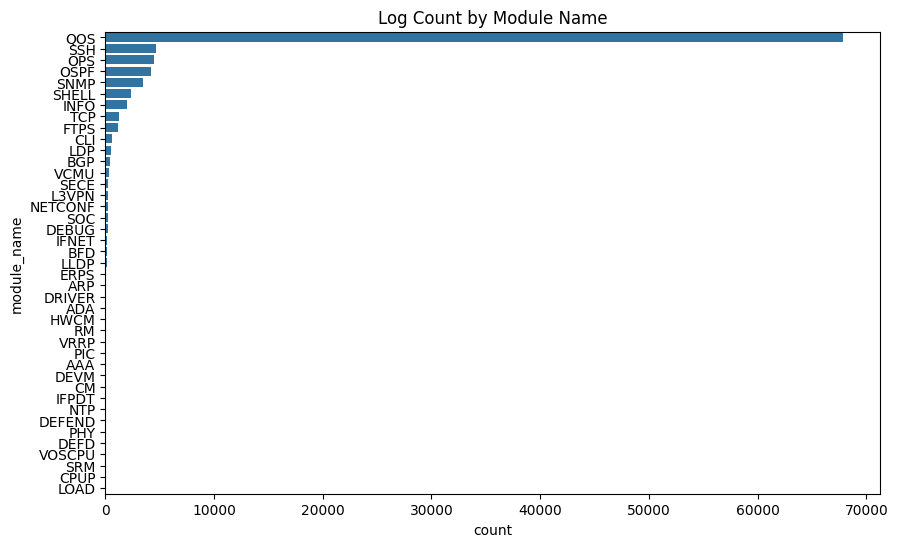

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='module_name', order=df['module_name'].value_counts().index)
plt.title('Log Count by Module Name')
plt.show()

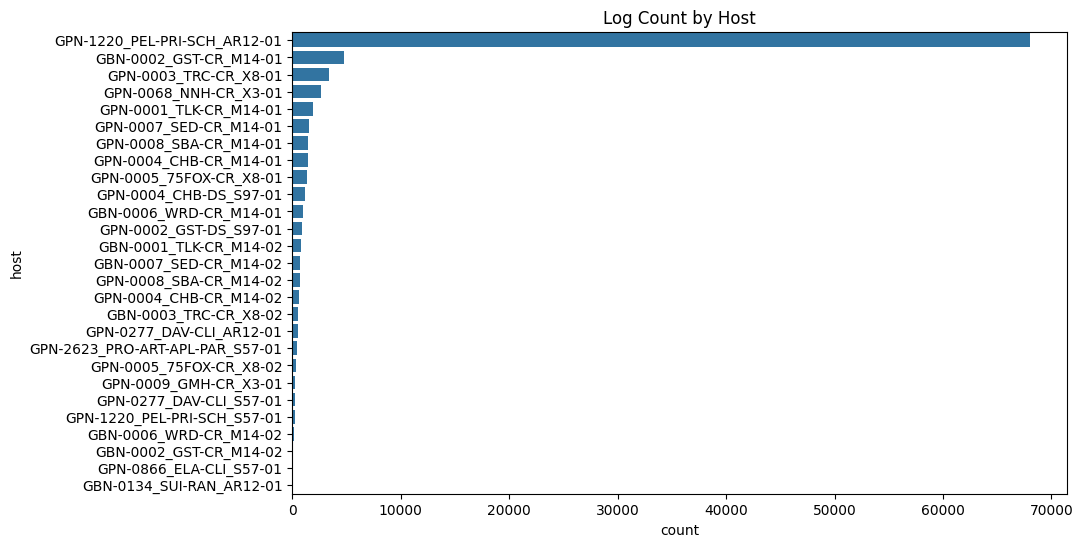

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='host', order=df['host'].value_counts().index)
plt.title('Log Count by Host')
plt.show()

In [23]:
df['severity'].value_counts()/total*100

severity
4    75.941
5    13.260
6     3.867
3     1.562
2     0.751
1     0.151
Name: count, dtype: float64

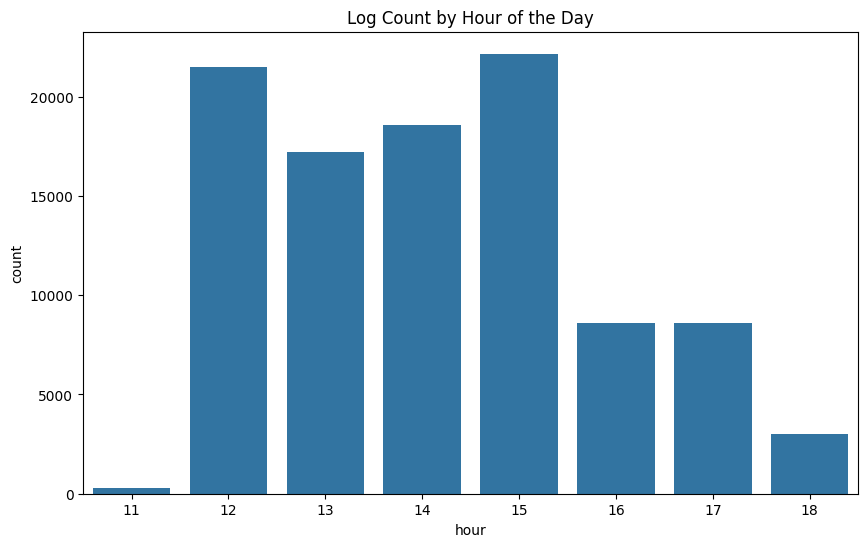

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hour', order=sorted(df['hour'].unique()))
plt.title('Log Count by Hour of the Day')
plt.show()


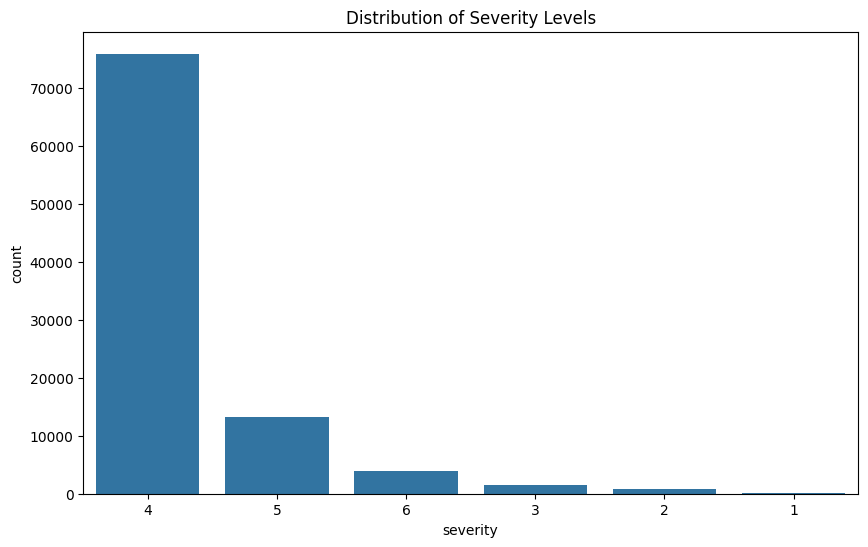

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='severity')
plt.title('Distribution of Severity Levels')
plt.show()

<Figure size 1400x700 with 0 Axes>

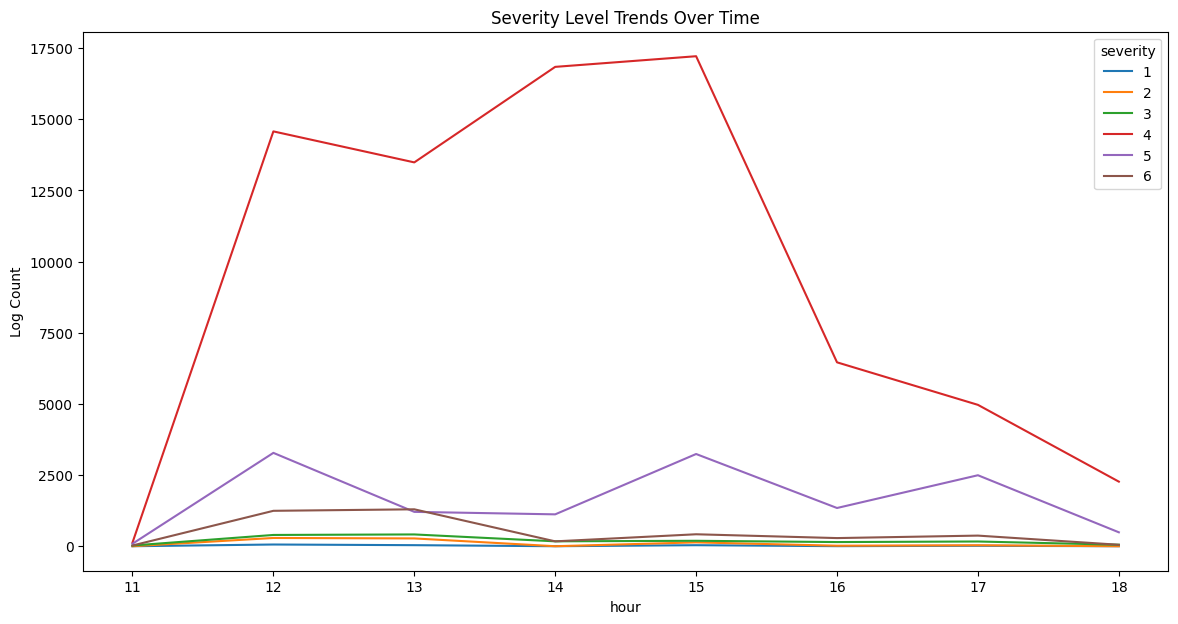

In [26]:
plt.figure(figsize=(14, 7))
df['date'] = df['timestamp'].dt.date
severity_trends = df.groupby(['hour', 'severity']).size().unstack(fill_value=0)
severity_trends.plot(kind='line', figsize=(14, 7))
plt.title('Severity Level Trends Over Time')
plt.ylabel('Log Count')
plt.show()

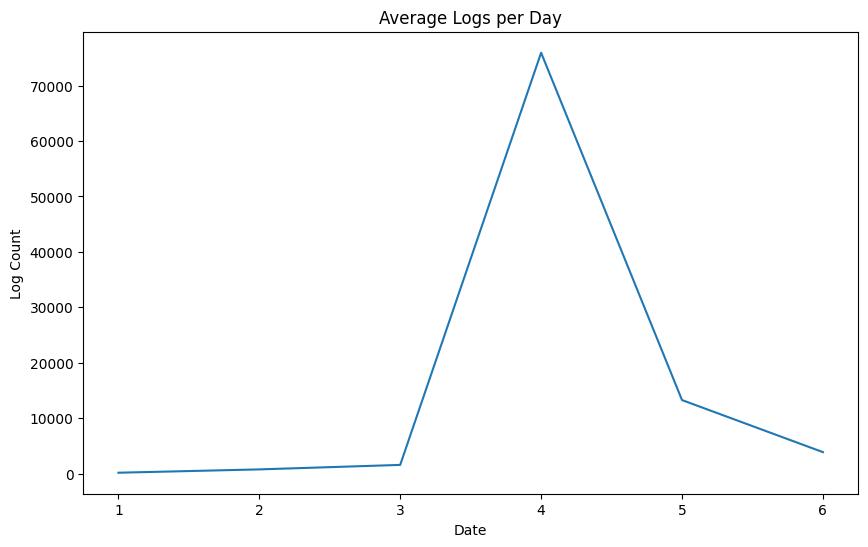

In [27]:

plt.figure(figsize=(10, 6))
logs_per_day = df.groupby('severity').size()
sns.lineplot(x=logs_per_day.index, y=logs_per_day.values)
plt.title('Average Logs per Day')
plt.xlabel('Date')
plt.ylabel('Log Count')
plt.show()


In [28]:
df

,timestamp,source,message,month,day,year,time,host,version_number,module_name,severity,log_type,description,hour,day_of_week,line_segment,date
0,2024-06-11 11:54:07.059000+00:00,syslog,Jun 11 2024 11:52:42 GPN-0003_TRC-CR_X8-01 %%0...,6,11,2024,11:52:42,GPN-0003_TRC-CR_X8-01,01,OSPF,4,CONFLICT_ROUTERID_INTF,Jun 11 2024 11:52:42 GPN-0003_TRC-CR_X8-01 %%0...,11,Tuesday,None,2024-06-11
1,2024-06-11 11:54:08.485000+00:00,syslog,Jun 11 2024 11:52:46 GPN-0001_TLK-CR_M14-01 %%...,6,11,2024,11:52:46,GPN-0001_TLK-CR_M14-01,01,SNMP,4,SNMP_IPUNLOCK,Jun 11 2024 11:52:46 GPN-0001_TLK-CR_M14-01 %%...,11,Tuesday,None,2024-06-11
2,2024-06-11 11:54:13.338000+00:00,syslog,Jun 11 2024 11:52:51 GPN-0277_DAV-CLI_AR12-01 ...,6,11,2024,11:52:51,GPN-0277_DAV-CLI_AR12-01,01,SNMP,5,SNMP_LOG_IP_UNLOCK,Jun 11 2024 11:52:51 GPN-0277_DAV-CLI_AR12-01 ...,11,Tuesday,None,2024-06-11
3,2024-06-11 11:54:14.203000+00:00,syslog,Jun 11 2024 11:26:54 GBN-0001_TLK-CR_M14-02 %%...,6,11,2024,11:26:54,GBN-0001_TLK-CR_M14-02,01,TCP,4,SOCKET_TCP_PACKET_MD5_AUTHEN_FAIL,Jun 11 2024 11:26:54 GBN-0001_TLK-CR_M14-02 %%...,11,Tuesday,None,2024-06-11
4,2024-06-11 11:54:14.203000+00:00,syslog,Jun 11 2024 11:26:54 GBN-0001_TLK-CR_M14-02 %%...,6,11,2024,11:26:54,GBN-0001_TLK-CR_M14-02,01,TCP,4,hwTCPMD5AuthenFail,Jun 11 2024 11:26:54 GBN-0001_TLK-CR_M14-02 %%...,11,Tuesday,None,2024-06-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2024-06-11 18:20:53.422000+00:00,syslog,Jun 11 2024 18:19:31 GPN-0866_ELA-CLI_S57-01 L...,6,11,2024,18:19:31,None,None,None,None,None,Jun 11 2024 18:19:31 GPN-0866_ELA-CLI_S57-01 L...,18,Tuesday,None,2024-06-11
99996,2024-06-11 18:20:54.449000+00:00,syslog,Jun 11 2024 18:19:32 GBN-0002_GST-CR_M14-01 %%...,6,11,2024,18:19:32,GBN-0002_GST-CR_M14-01,01,OSPF,4,ospfIfConfigError,Jun 11 2024 18:19:32 GBN-0002_GST-CR_M14-01 %%...,18,Tuesday,None,2024-06-11
99997,2024-06-11 18:20:54.817000+00:00,syslog,Jun 11 2024 18:19:32 GBN-0002_GST-CR_M14-01 %%...,6,11,2024,18:19:32,GBN-0002_GST-CR_M14-01,01,SSH,5,SSH_USER_LOGIN_FAIL,Jun 11 2024 18:19:32 GBN-0002_GST-CR_M14-01 %%...,18,Tuesday,None,2024-06-11
99998,2024-06-11 18:20:55.599000+00:00,syslog,Jun 11 2024 18:19:33 GPN-0003_TRC-CR_X8-01 %%0...,6,11,2024,18:19:33,GPN-0003_TRC-CR_X8-01,01,SNMP,3,SNMP_AUTHEN_FAILED,Jun 11 2024 18:19:33 GPN-0003_TRC-CR_X8-01 %%0...,18,Tuesday,None,2024-06-11


In [29]:
# saving the dataframe
df.to_csv('Networking.csv')

In [31]:
df.columns

Index(['timestamp', 'source', 'message', 'month', 'day', 'year', 'time',
       'host', 'version_number', 'module_name', 'severity', 'log_type',
       'description', 'hour', 'day_of_week', 'line_segment', 'date'],
      dtype='object')

In [42]:

file_path = '/home/in2itadmin/Downloads/Syslog.csv'
data = pd.read_csv(file_path)

data.head()


,timestamp,source,message
0,2024-06-11T11:54:07.059Z,syslog,Jun 11 2024 11:52:42 GPN-0003_TRC-CR_X8-01 %%0...
1,2024-06-11T11:54:08.485Z,syslog,Jun 11 2024 11:52:46 GPN-0001_TLK-CR_M14-01 %%...
2,2024-06-11T11:54:13.338Z,syslog,Jun 11 2024 11:52:51 GPN-0277_DAV-CLI_AR12-01 ...
3,2024-06-11T11:54:14.203Z,syslog,Jun 11 2024 11:26:54 GBN-0001_TLK-CR_M14-02 %%...
4,2024-06-11T11:54:14.203Z,syslog,Jun 11 2024 11:26:54 GBN-0001_TLK-CR_M14-02 %%...


In [43]:


def extract_log_details(log_message):
    log_details = {}
    
    date_pattern = re.compile(r"(\w+)\s+(\d+)\s+(\d+)\s+(\d+:\d+:\d+)")
    host_pattern = re.compile(r"(\S+)")
    module_pattern = re.compile(r"(\S+)/(\d+)/(\S+):")
    description_pattern = re.compile(r'(?P<description>.*)$')

    date_match = date_pattern.match(log_message)
    if date_match:
        month, day, year, time = date_match.groups()
        log_details["year"] = year
        log_details["month"] = month
        log_details["day"] = day
        log_details["time"] = time


    host_match = host_pattern.search(log_message, date_match.end())
    if host_match:
        host = host_match.group(1)
        log_details["host"] = host

    module_match = module_pattern.search(log_message, host_match.end())
    if module_match:
        module, level, event = module_match.groups()
        log_details["moduleName"] = module
        log_details["servity"] = level
        log_details["event"] = event

    description_match = description_pattern.search(log_message, module_match.end())
    if description_match:
        description = description_match.group('description')
        log_details["description"] = description

    log_details["logType"] = "LOGINFAILED"  
    log_details["versionNumber"] = "01"  
    log_details["line"] = module  

    return log_details

log_details_list = data['message'].apply(extract_log_details)

log_details_df = pd.DataFrame(log_details_list.tolist())

log_details_df.head()


,year,month,day,time,host,moduleName,servity,event,description,logType,versionNumber,line
0,2024,Jun,11,11:52:42,GPN-0003_TRC-CR_X8-01,%%01OSPF,4,CONFLICT_ROUTERID_INTF(l),CID=0x8082047e;OSPF router ID conflict is dete...,LOGINFAILED,01,%%01OSPF
1,2024,Jun,11,11:52:46,GPN-0001_TLK-CR_M14-01,%%01SNMP,4,SNMP_IPUNLOCK(s),CID=0x80d50422;The source IP was unlocked.(Sou...,LOGINFAILED,01,%%01SNMP
2,2024,Jun,11,11:52:51,GPN-0277_DAV-CLI_AR12-01,%%01SNMP,5,SNMP_LOG_IP_UNLOCK(l)[120208],The IP address of request message was unlocked...,LOGINFAILED,01,%%01SNMP
3,2024,Jun,11,11:26:54,GBN-0001_TLK-CR_M14-02,%%01TCP,4,SOCKET_TCP_PACKET_MD5_AUTHEN_FAIL(l),CID=0x80650553;TCP MD5 authentication failed. ...,LOGINFAILED,01,%%01TCP
4,2024,Jun,11,11:26:54,GBN-0001_TLK-CR_M14-02,%%01TCP,4,hwTCPMD5AuthenFail(t),CID=0x80650553-OID=1.3.6.1.4.1.2011.5.25.34.2....,LOGINFAILED,01,%%01TCP


In [44]:
log_details_df.isnull().sum()

year             0
month            0
day              0
time             0
host             0
moduleName       0
servity          0
event            0
description      0
logType          0
versionNumber    0
line             0
dtype: int64

In [50]:
print(df.duplicated().sum())

769


In [46]:
log_details_df['logType'].value_counts()

logType
LOGINFAILED    100000
Name: count, dtype: int64